In [1]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

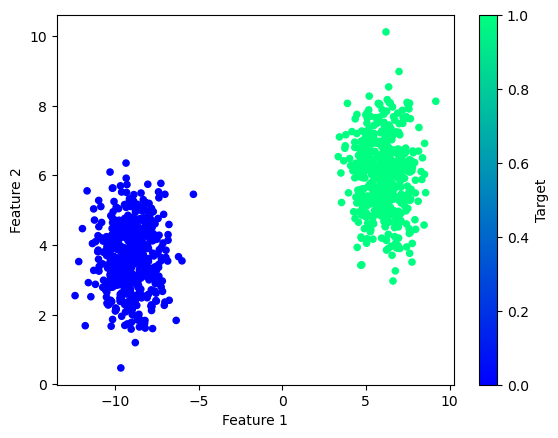

In [2]:
# Import the sample data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_1/datasets/sample-data-1000.csv")

# Plot the sample data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Separate the X and y
X = df.drop(columns="Target")
y = df["Target"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [13]:
len(X.columns)

2

In [6]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=input_nodes))

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 1.0000 - loss: 0.0033
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 1.0000 - loss: 0.0022
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 1.0000 - loss: 0.0018
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 1.0000 - loss: 0.0015
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 1.0000 - loss: 0.0015
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 1.0000 - loss: 0.0013  
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 1.0000 - loss: 0.0011  
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 1.0000 - loss: 9.3444e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 1.0000 - loss: 7.8267e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 1.0000 - loss: 6.5824e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 1.0000 - loss: 7.6049e-04
Epoch 12/100
24/24 ━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 1.0000 - loss: 4.8641e-05
Epoch 67/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 1.0000 - loss: 3.5640e-05
Epoch 68/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 1.0000 - loss: 4.7049e-05
Epoch 69/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 1.0000 - loss: 4.0368e-05
Epoch 70/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 1.0000 - loss: 6.1706e-05
Epoch 71/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 1.0000 - loss: 3.9697e-05
Epoch 72/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 1.0000 - loss: 3.8151e-05
Epoch 73/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 1.0000 - loss: 3.6638e-05
Epoch 74/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 1.0000 - loss: 3.3019e-05
Epoch 75/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 1.0000 - loss: 4.2514e-05
Epoch 76/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 1.0000 - loss: 3.6262e-05
E

<Axes: >

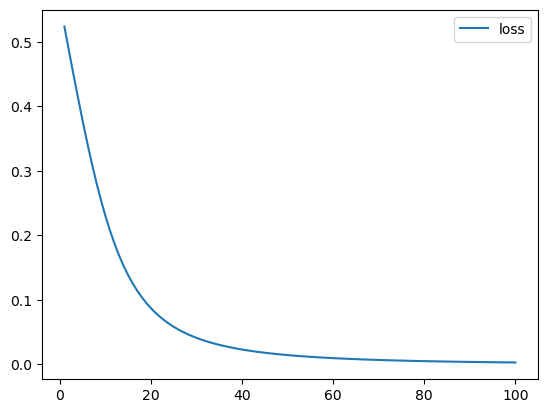

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

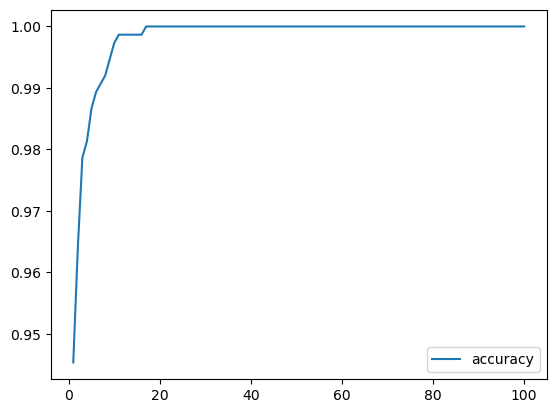

In [11]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0023
Loss: 0.002284290036186576, Accuracy: 1.0
